<h2><center>Applied Machine Learning - Assignment 3</center></h2>
<h4><center>Lorenzo Cirac Monteagduo</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Question 1.1 - Data Preprocessing</h3>
<p>You are required to pre-process given datasets:</p>
<ul>
    <li>Airfare and demand: http://www.stat.ufl.edu/~winner/data/airq402.dat</li>
    <li>Wine Quality: http://archive.ics.uci.edu/ml/datasets/Wine+Quality</li>
</ul>
<p>Tasks:</p>
<ol>
    <li>Convert any non-numeric values to numeric values. For example, replace a country name with an integer value
or, more appropriately, use hot-one encoding. [Hint: use hashmap (dict) or pandas.get dummies]. Please
explain your solution.</li>
    <li>Handle sparse data/missing values.</li>
    <li>Split the data into a training set (80%) and a test set (20%).</li>
</ol>
<h4>Task 1.1.1 + 1.1.2 (for each dataset)</h4>

<h4>Airfare and demand dataset</h4>
<p>By reviewing the data, we see that there are no column names present. We will set header = None to prevent the first entry of the data from being interpreted as the column names: </p>

In [2]:
aad = pd.read_csv('res/airq402.dat.txt', sep = '\\s+', header = None)

<p>Based on the data description (https://users.stat.ufl.edu/~winner/data/airq402.txt), we can now add the column names:</p>

In [3]:
aad.columns = [
    'City1', 'City2', 'Average Fare', 'Distance', 'Average Weekly Passengers',
    'Market Leading Airline', 'Market Share (Leading Airline)', 'Average Fare (Low Price Airline)',
    'Low Price Airline', 'Market Share (Low Price Airline)', 'Price (Low Price Airline)'
]
aad

,City1,City2,Average Fare,Distance,Average Weekly Passengers,Market Leading Airline,Market Share (Leading Airline),Average Fare (Low Price Airline),Low Price Airline,Market Share (Low Price Airline),Price (Low Price Airline)
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
...,...,...,...,...,...,...,...,...,...,...,...
995,SYR,TPA,136.16,1104,184.34,US,33.37,135.82,DL,28.65,118.51
996,TLH,TPA,83.28,200,232.71,FL,99.57,82.55,FL,99.57,82.55
997,TPA,IAD,159.97,814,843.80,US,46.19,159.65,DL,13.89,159.02
998,TPA,PBI,73.57,174,214.45,WN,99.74,73.44,WN,99.74,73.44


In [4]:
aad = pd.get_dummies(aad, columns = ['City1', 'City2', 'Market Leading Airline', 'Low Price Airline'], drop_first = True).astype(float)
aad

,Average Fare,Distance,Average Weekly Passengers,Market Share (Leading Airline),Average Fare (Low Price Airline),Market Share (Low Price Airline),Price (Low Price Airline),City1_ACY,City1_ALB,City1_AMA,...,Low Price Airline_G4,Low Price Airline_HP,Low Price Airline_NK,Low Price Airline_NW,Low Price Airline_SY,Low Price Airline_TZ,Low Price Airline_UA,Low Price Airline_US,Low Price Airline_WN,Low Price Airline_YX
0,114.47,528.0,424.56,70.19,111.03,70.19,111.03,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,122.47,860.0,276.84,75.10,123.09,17.23,118.94,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,214.42,852.0,215.76,78.89,223.98,2.77,167.12,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69.40,288.0,606.84,96.97,68.86,96.97,68.86,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,158.13,723.0,313.04,39.79,161.36,15.34,145.42,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,136.16,1104.0,184.34,33.37,135.82,28.65,118.51,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,83.28,200.0,232.71,99.57,82.55,99.57,82.55,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,159.97,814.0,843.80,46.19,159.65,13.89,159.02,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,73.57,174.0,214.45,99.74,73.44,99.74,73.44,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<p>We applied one-hot encoding to transform categorical data like cities and airlines into binary numerical columns. Setting drop_first = True eliminates one category per feature to avoid redundancy and prevent multicollinearity, where one category could be inferred from the others. This approach ensures that each category is represented independently, allowing the model to learn patterns associated with each without implying any ranking or order among them. Overall, this preprocessing step prepares the data effectively for accurate and efficient model training. Let's check if we have any missing values:</p>

In [5]:
print(f'Sum of NaN values: {aad.isnull().sum().sum()}')

Sum of NaN values: 0


<h4>Wine Quality Data</h4>
<p>The wine quality datasets are separated by semicolons, so we need to specify the appropriate delimiter in the pandas read_csv() function:</p>

In [6]:
white_wine_df = pd.read_csv('res/winequality-white.csv', delimiter = ';')
red_wine_df = pd.read_csv('res/winequality-red.csv', delimiter = ';')

<p>Both DataFrames contain the same columns; the only distinguishing factor is the type of wine. Therefore, we will introduce a new boolean variable into each DataFrame to indicate whether the wine is red or white. After adding this variable, we can merge the two DataFrames.</p>

In [7]:
# White wine
white_wine_df["type"] = 0.0

# Red wine
red_wine_df["type"] = 1.0

In [8]:
wine = pd.concat([red_wine_df, white_wine_df], ignore_index = True).astype(float)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6.0,0.0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5.0,0.0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,0.0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,0.0


<p>The wine DataFrame consists of numerical values, requiring no modifications. Additionally, each column is free of null values.</p>

In [9]:
print(f'Sum of NaN values: {aad.isnull().sum().sum()}')

Sum of NaN values: 0


<h4>Task 1.3</h4>
<p>Split the data into a training set (80%) and a test set (20%).</p>
<h4>Solution</h4>

<p>Since we are not permitted to use any machine learning libraries to split our data, we will manually perform this task as we did in the second assignment.</p>

In [10]:
# Airfare and demand
aad = aad.sample(frac = 1)

# Wine
wine = wine.sample(frac = 1)

<p><p>As the target variable was not specified in the Airfare and Demand dataset, we chose to predict the average airfare price. This approach offers insights into factors influencing pricing, including distance, market competition, and weekly passenger volume.</p>
<p>Based on the description of the Wine dataset, our objective is to predict the quality rating of the wine.</p></p>

In [11]:
# Airfare and demand
XAaD = aad.drop('Average Fare', axis = 1)
YAaD = aad['Average Fare']

# Wine
Xwine = wine.drop('quality', axis = 1)
Ywine = wine['quality']

In [12]:
# Airfare and demand
partition_aad = int(len(aad) * 0.8)
XTrainAaD, YTrainAaD = XAaD[:partition_aad].to_numpy(), YAaD[:partition_aad].to_numpy()
XTestAaD, YTestAaD = XAaD[partition_aad:].to_numpy(), YAaD[partition_aad:].to_numpy()

# Wine
partition_wine = int(len(wine) * 0.8)
XTrainWine, YTrainWine = Xwine[:partition_wine].to_numpy(), Ywine[:partition_wine].to_numpy()
XTestWine, YTestWine = Xwine[partition_wine:].to_numpy(), Ywine[partition_wine:].to_numpy()

<h3>Question 1.2 - Linear Regression with Gradient Descent</h3>
<p><b>Part A</b>: Implement Linear Regression with Gradient Descent In this part, you are required
to implement a linear regression algorithm with gradient descent.
For each dataset provided above:</p>

<ul>
    <li>A set of training data $D_{train} = \left\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(N)}, y^{(N)}) \right\}, \quad x \in \mathbb{R}^M, \quad y \in \mathbb{R}$, where $N$ is the number of training examples, and $M$ is the number of features.</li>
    <li>The Linear Regression model is given as $y_n = \sum_{m=1}^M \beta_m x_{n}^{m}$</li>
    <li>The Least Square Loss Function is give as $l(x,y) = \sum_{n=1}^N (y_n - \hat{y}_n)^2$</li>
    <li>Minimize the loss function $l(x,y)$ using the Gradient Descent algorithm. Implement (learn-linregGD and minimize-GD). Choose $i_{max}$ between 100 to 1000.</li>
    <li>Choose three suitable values for the step length $\alpha > 0$. For each step length:
        <ul>
            <li>In each iteration of the minimize-GD algorithm, calculate $|f(x_{i−1}) − f(x_i)|$ and, at the end of learning,
plot it against the iteration number $i$. Explain the graph.</li>
            <li>In each iteration step, also calculate the RMSE on the test set $RMSE = \sqrt{\frac{\sum_{q=1}^T (y_{test}^q - \hat{y}^q)^2}{T}}$ and, at the end of learning, plot it against the iteration number $i$. Explain the graph.</li>
        </ul>
    </li>
</ul>
<p><b>Part B</b>: This task is based on Part A. Implement two algorithms: steplength-armijo and steplength-bolddriver given below. For each step length algorithm:</p>
<ul>
    <li>In each iteration of the minimize-GD algorithm, calculate $|f(x_{i−1}) − f(x_i)|$ and, at the end of learning,
plot it against the iteration number $i$. Explain the graph.</li>
            <li>In each iteration step, also calculate the RMSE on the test set $RMSE = \sqrt{\frac{\sum_{q=1}^T (y_{test}^q - \hat{y}^q)^2}{T}}$ and, at the end of learning, plot it against the iteration number $i$. Explain the graph.</li>
</ul>

<h4>Solution - Linear Regression with Gradient Descent Model for Part A and B</h4>
<p>Given the complexity of this task and the numerous intermediate steps involved, I chose to encapsulate the entire model within a single class. This structure enables clear organization and modularity. I will now outline and number each key intermediate step, allowing for easy identification and reference within the code.</p>

<h5>(1) Linear Regression Model</h5>
<p>
The Linear Regression model is given as $y_n = \sum_{m=1}^M \beta_m x_{n}^{m}$<br>
This formulation is equivalent to implementing $\hat{y} = X \hat{\beta}$<br>
Instead of predicting a single value $y_n$, we will predict every value in the output vector $\hat{y}$
</p>

<h5>(2) Least Square Loss Function</h5>
<p>
The Least Square Loss Function is given as $l(x,y) = \sum_{n=1}^N (y_n - \hat{y}_n)^2$<br>
</p>

<h5>(3) Gradient of the Least Square Loss Function</h5>
<p>To compute the gradient of our least squares loss function, we will first transform the function.</p>
<p>
$l(\hat{\beta}) = (y - X\hat{\beta})^T (y - X\hat{\beta})$ <br>
$ = y^Ty - y^TX\hat{\beta} - \hat{\beta}^TX^Ty + \hat{\beta}^TX^TX\hat{\beta}$ <br>
$ = y^Ty - y^TX\hat{\beta} - (X\hat{\beta})^Ty + \hat{\beta}^TX^TX\hat{\beta}$ <br>
$ = y^Ty - y^TX\hat{\beta} - y^TX\hat{\beta} + \hat{\beta}^TX^TX\hat{\beta}$ <br>
$ = y^Ty - 2y^TX\hat{\beta} + \hat{\beta}^TX^TX\hat{\beta}$ <br> 
</p>
<p>Now we will look at each part of the reduced term to construct the gradient piece by piece:</p>
<p>
1. First term:
$\nabla_\hat{\beta} l(y^Ty) = 0$ <br>
Since $y^Ty$ is a constant with respect to $\hat{\beta}$, its gradient is zero. <br>
<br>
2. Second term: $\nabla_\hat{\beta} l(- 2y^TX\hat{\beta}) = -2X^Ty$ <br>
<br>
3. Third term: $\nabla_\hat{\beta} l(\hat{\beta}^TX^TX\hat{\beta})$ <br>
We want to compute the gradient of the term:
Let $A = X^TX$. Then we have: <br>
$$l(\hat{\beta}) = \sum_{i = 1}^{n} \sum_{j = 1}^{n} \hat{\beta_i} A_{ij} \hat{\beta_j}$$
The partial derivative of $l(\hat{\beta})$ with respect to $\hat{\beta_k}$ is: <br>
$$\frac{\partial l}{\partial \hat{\beta_k}} = \sum_{j = 1}^{n} A_{kj}\hat{\beta_j} + \sum_{i = 1}^{n} \hat{\beta_i}A_{ik} = (A\hat{\beta})_k + (A^T\hat{\beta})_k$$
Since $A = X^TX$ is symmetric, $A = A^T$, and we get: <br>
$$(A\hat{\beta})_k + (A^T\hat{\beta})_k = 2(A\hat{\beta})_k = 2(X^TX\hat{\beta})_k$$ 
Thus, <br>
$$\nabla_\hat{\beta} l(\hat{\beta}^TX^TX\hat{\beta}) = 2X^TX\hat{\beta}$$ 
4. Combining the Derivatives: <br>
Now, we combine the results of the derivatives: $$\nabla_\hat{\beta} l(\hat{\beta}) = 0 - 2X^Ty + 2X^TX\hat{\beta} = -2X^T(y - X\hat{\beta})$$
Therefore, the final result is: <br>
$$\nabla_\hat{\beta} l(\hat{\beta}) = -2X^T(y - X\hat{\beta})$$
</p>

<h5>(4) Learn-LinReg_GD</h5>
<img src = "res/Learn LinReg GD Algorithm.png">

<h5>(5) Minimize_GD</h5>
<img src = "res/Minimize GD Algorithm.png">

<h5>(6) Armijo Steplength Algorithm</h5>
<img src = "res/Steplength Armijo Algorithm.png">

<h5>(7) Bold Driver Steplength Algorithm</h5>
<img src = "res/Steplength Bold Driver Algorithm.png">

<h5>(8) Gradient Clipping</h5>
<p>A large gradient can cause the alogrithm to take very large steps potentially overshooting the minimum of the cost function. We will prevent this, by scaling it down using its norm.</p>

In [13]:
class LinearRegressionGD:

    # ---------- Task A ----------
    
    def __init__(self, step_length, i_max=1000, epsilon=1e-3):
        self.step_length = step_length
        self.i_max = i_max
        self.epsilon = epsilon

        self.delta_f_values = []
        self.RMSE_values = []

    # (1)
    def predict(self):  
        return self.Xtest @ self.beta

    # (4)
    def learn_linreg_GD(self, Xtrain, Ytrain, Xtest, Ytest):
        
        # Test Data
        self.Xtest = self._normalize(Xtest)
        self.Ytest = self._normalize(Ytest)[:, np.newaxis]

        # Train Data
        self.Xtrain = self._normalize(Xtrain)
        self.Ytrain = self._normalize(Ytrain)[:, np.newaxis]

        beta = np.zeros((self.Xtrain.shape[1], 1))
        self.beta = self._minimize_GD(beta)
        
        return self.beta
    
    # (5)
    def _minimize_GD(self, beta):
        f = lambda x: self._square_loss(x)
        g = lambda x: self._gradient_square_loss(x)
        alpha = 1
        
        for i in range(self.i_max):
            d = - g(beta)

            # (8) Gradient Clipping
            norm = np.linalg.norm(d)
            d = d * (1 / norm)
            
            # Step length calculation
            if self.step_length[0] == 'fixed':
                alpha = self.step_length[1]
            elif self.step_length[0] == 'armijo':
                alpha = self._armijo_step(f, beta, d)
            elif self.step_length[0] == 'bold_driver':
                alpha = self._bold_driver_step(f, beta, d, alpha)
            else:
                raise ValueError('Unknown step length method.')
            
            new_beta = beta + alpha * d

            # For Plotting
            delta_f = f(beta) - f(new_beta)
            self.delta_f_values.append(np.abs(delta_f))

            RMSE = self._RMSE(new_beta)
            self.RMSE_values.append(RMSE)
            
            beta = new_beta 
            if delta_f < self.epsilon:
                return beta
                
        # print(f'\033[91mNot converged in {self.i_max} iterations.\033[0m')

    # (2) Least Square Loss Function
    def _square_loss(self, beta):
        return np.sum((self.Ytrain - self.Xtrain @ beta) ** 2)

    # (3) Gradient Least Square Loss Function
    def _gradient_square_loss(self, beta):
        return -2 * self.Xtrain.T @ (self.Ytrain - self.Xtrain @ beta)

    def _RMSE(self, beta):
        y_pred = self.Xtest @ beta
        rmse = np.sqrt(np.mean((self.Ytest - y_pred) ** 2))
        return rmse

    # Normalization
    def _normalize(self, data):
        data_min = np.min(data)
        data_max = np.max(data)
        return (data - data_min) / (data_max - data_min)

    # ---------- Task B ----------

    # (6)
    def _armijo_step(self, f, beta, d):
        '''
        Argument Tuple: step_length = ('armijo', delta)
        - "armijo": specifies the Armijo step length strategy
        - "delta" := minimum steepness
        '''
        alpha = 1.0
        delta = self.step_length[1] 
        while f(beta) - f(beta + alpha * d) < alpha * delta * (d.T @ d):
            alpha /= 2 
        return alpha

    # (7)
    def _bold_driver_step(self, f, beta, d, alpha_before):
        '''
        Argument Tuple: step_length = ('bold_driver', alpha+, alpha-)
        - "bold_driver": specifies the Bold Driver step length strategy
        - "alpha+": factor to increase the step length
        - "alpha-": factor to decrease the step length
        '''
        alpha = alpha_before * self.step_length[1]
        
        while (f(beta) - f(beta + alpha * d)) <= 0:
            alpha *= self.step_length[2]
        return alpha

<h4>Function for Testing and Plotting</h4>

In [14]:
def plot_steplength(XTrain, YTrain, XTest, YTest, step_length_type, step_params, use_symlog = False):
    for i, params in enumerate(step_params):
        if step_length_type == 'fixed':
            model = LinearRegressionGD(step_length = ('fixed', params), i_max = 1000, epsilon = 1e-3)
        elif step_length_type == 'armijo':
            model = LinearRegressionGD(step_length = ('armijo', params), i_max = 1000, epsilon = 1e-3)
        elif step_length_type == 'bold_driver':
            model = LinearRegressionGD(step_length = ('bold_driver', params[0], params[1]), i_max = 1000, epsilon = 1e-3)
        else:
            raise ValueError('Unsupported step length type')

        model.learn_linreg_GD(XTrain, YTrain, XTest, YTest)

        iterations = range(len(model.delta_f_values))
        plt.figure(figsize = (10,8))

        # Plot for Delta f
        plt.subplot(3, 2, 2 * i + 1)
        plt.plot(iterations, model.delta_f_values, color = 'blue')
        plt.xlabel('Iteration')
        plt.ylabel('Delta f')
        if use_symlog:
            plt.yscale('symlog')
        plt.title('Change in Loss Function over Iterations')
        plt.grid(True, which = 'both', linestyle = '--')

        # Plot for RMSE
        plt.subplot(3, 2, 2 * i + 2)
        plt.plot(iterations, model.RMSE_values, color = 'orange')
        plt.xlabel('Iteration')
        plt.ylabel('RMSE')
        plt.title('Change in RMSE Over Iterations')
        plt.grid(True, which = 'both', linestyle = '--')

        plt.tight_layout()
        plt.show()

<h3>RESULTS</h3>

<h4>Airfare and demand dataset</h4>
<h5>Part A: Fixed Steplength</h5>

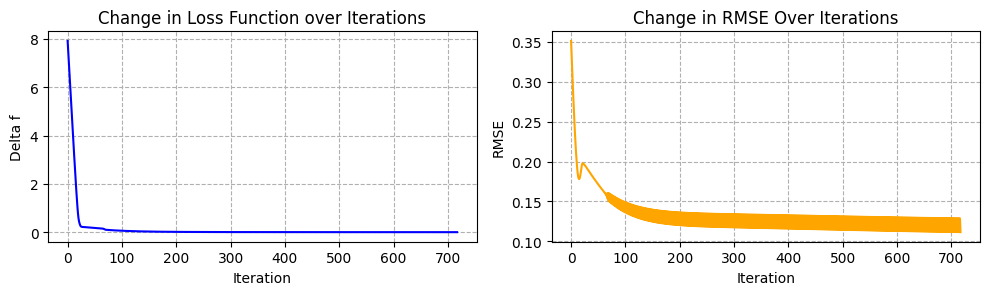

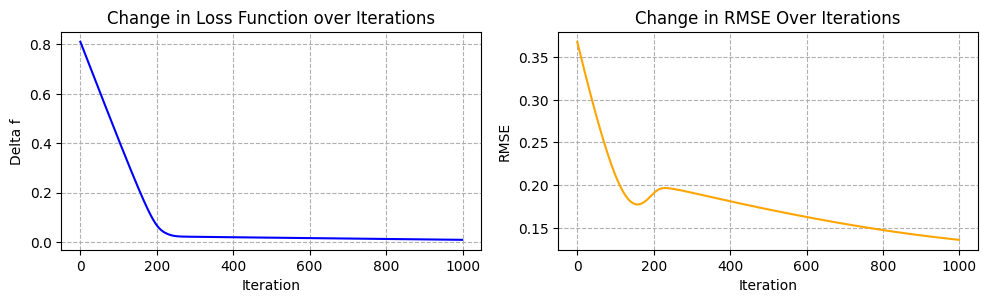

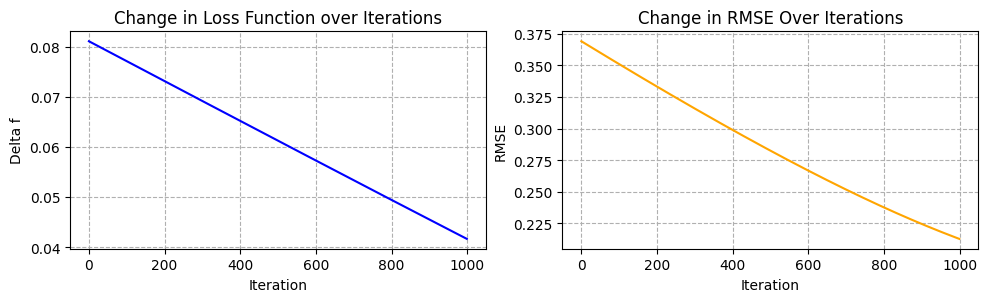

In [15]:
alphas = [0.1, 0.01, 0.001]
plot_steplength(XTrainAaD, YTrainAaD, XTestAaD, YTestAaD, 'fixed', alphas)

<p>As expected, the change in the least squares loss function decreases as the number of iterations increases, indicating gradual model convergence. This steady reduction in loss is reflected in the RMSE, which also declines over time, demonstrating improved model accuracy with each iteration. The choice of step size has a significant impact on whether the algorithm converges; specifically, a smaller step size may prolong convergence but results in a more precise model.</p>

<h5>Part B: Armijo Steplength</h5>

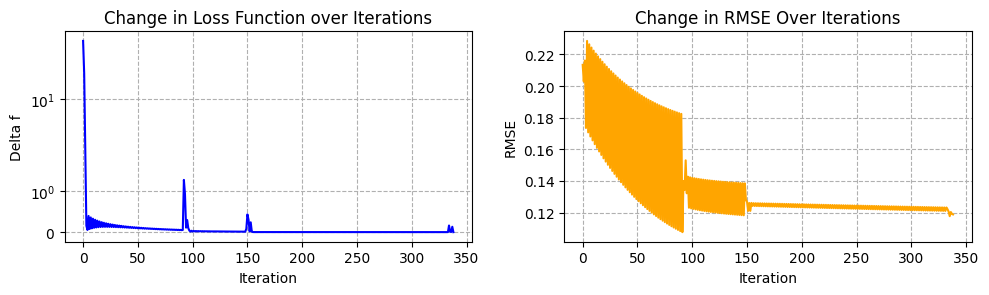

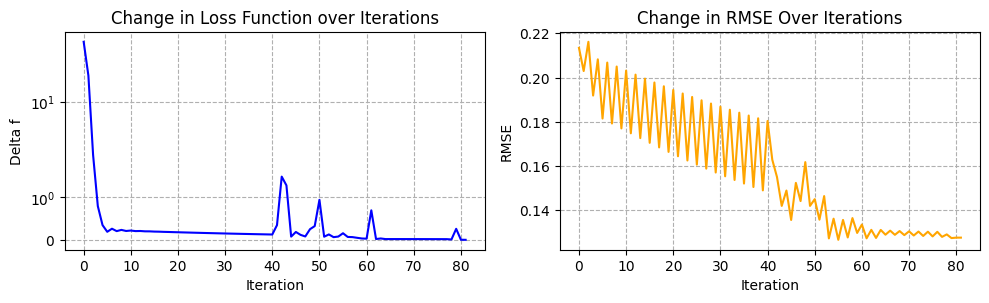

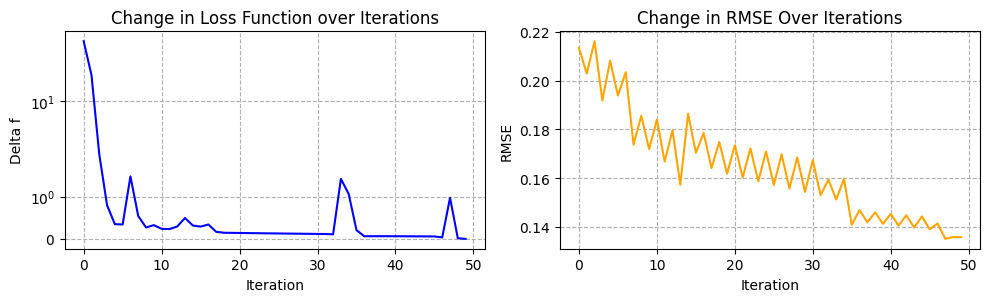

In [16]:
deltas = [0.1, 0.5, 0.9]
plot_steplength(XTrainAaD, YTrainAaD, XTestAaD, YTestAaD, 'armijo', deltas, True)

<p>As you can see, the Armijo step size calculation requires significantly fewer iterations than a fixed step size. A smaller decrease factor results in less frequent recalculation of the step size. In contrast, a larger decrease factor allows for more frequent adjustments to the step size, which can accelerate convergence.

Whenever the criterion in the while loop is met, the alpha value is recalculated, leading to an improvement. This explains the visible "spikes" in the change of the loss function graph.</p>

<h5>Part B: Bold Driver Steplength</h5>

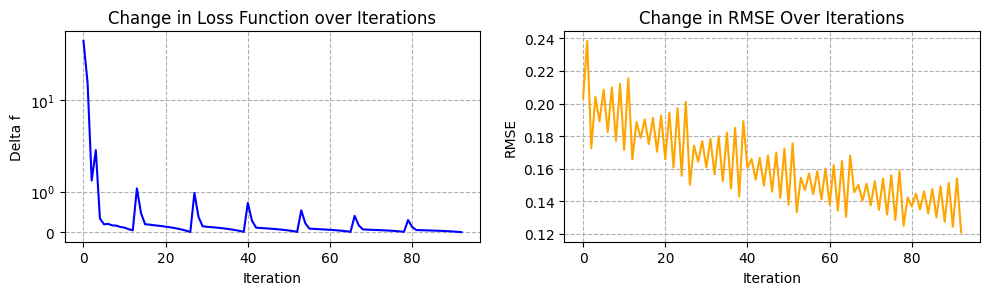

In [17]:
alphas_pm = [(1.1, 0.5)]
plot_steplength(XTrainAaD, YTrainAaD, XTestAaD, YTestAaD, 'bold_driver', alphas_pm, True)

<p>The Bold Driver step size algorithm begins by gradually increasing the step size to find an optimal value. Initially, it seeks to enhance the step size until it becomes excessively large, at which point it adjusts the step size (denoted as alpha) to stabilize the learning process. This adaptive adjustment leads to improvements in convergence efficiency. The effects of this algorithm can be observed in the "spikes" on the convergence plot, where the step size is dynamically modified in response to the gradient's behavior.</p>

<h4>Wine Quality</h4>
<h5>Part A: Fixed Steplength</h5>

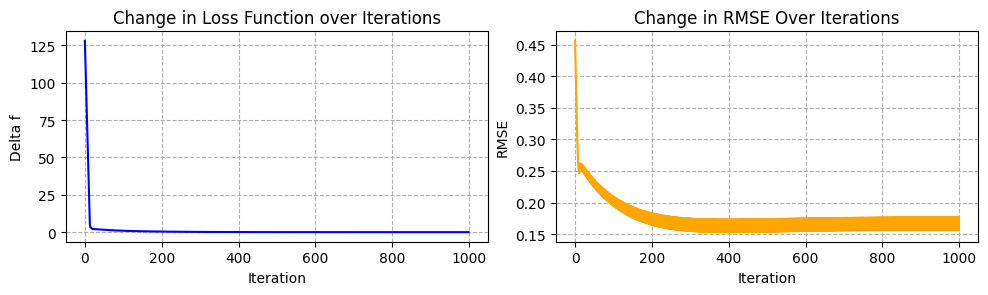

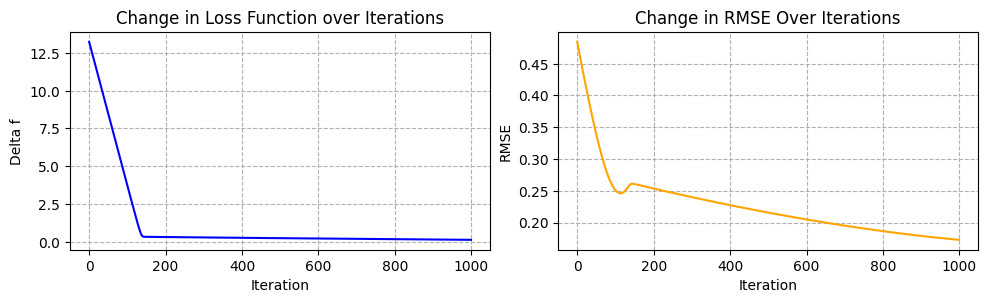

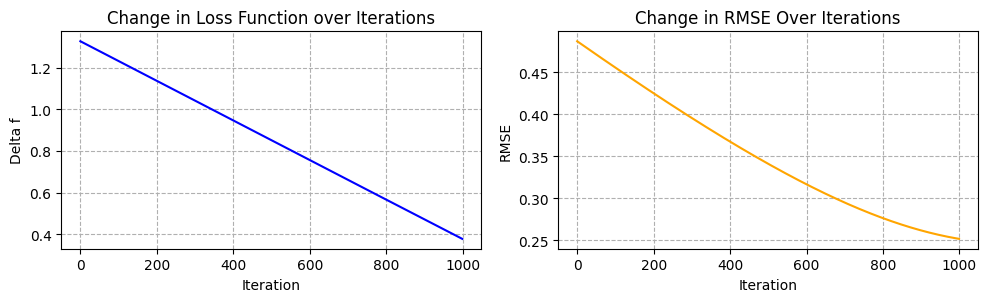

In [18]:
alphas = [0.1, 0.01, 0.001]
plot_steplength(XTrainWine, YTrainWine, XTestWine, YTestWine, 'fixed', alphas)

<p>Just like the Airfare and Demand dataset, the change in the least squares loss function decreases as the number of iterations increases, indicating gradual model convergence. This steady reduction in loss is reflected in the RMSE, which also declines over time, demonstrating improved model accuracy with each iteration. The choice of step size has a significant impact on whether the algorithm converges; specifically, a smaller step size may prolong convergence but results in a more precise model. With this dataset, it is difficult to find a fixed step size in which the model converges in less than 1000 iterations.</p>

<h5>Part B: Armijo Steplength</h5>

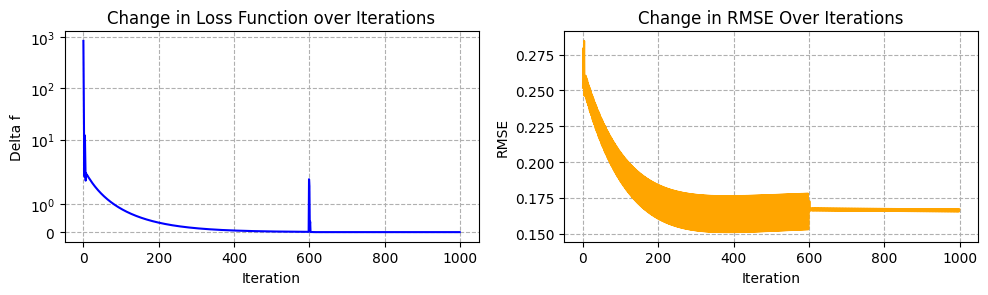

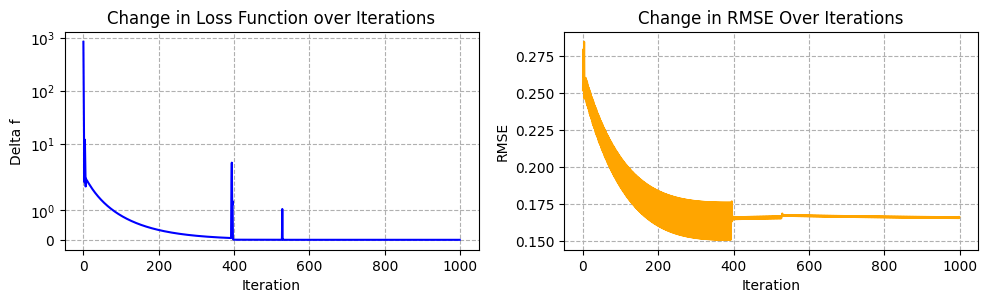

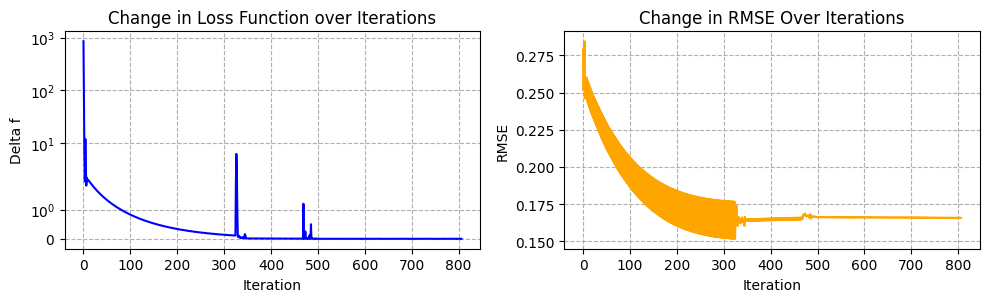

In [19]:
deltas = [0.1, 0.5, 0.9]
plot_steplength(XTrainWine, YTrainWine, XTestWine, YTestWine, 'armijo', deltas, True)

<p>For the Wine Quality Dataset, the Armijo Steplength Algorithm is no better when it comes to the number of iterations. The previously mentioned observations apply.</p>

<h5>Part B: Bold Driver Steplength</h5>

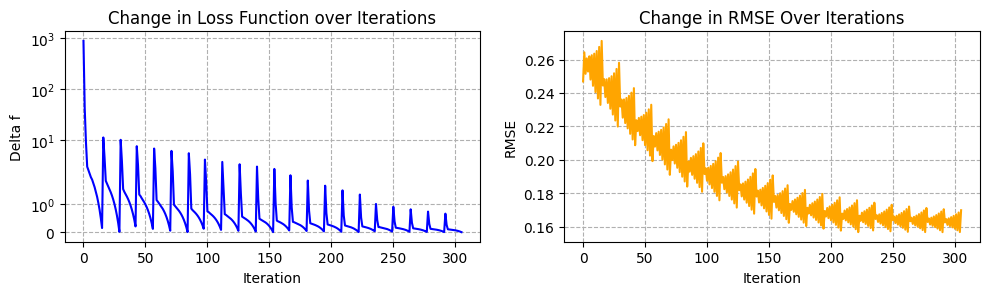

In [20]:
alphas_pm = [(1.1, 0.5)]
plot_steplength(XTrainWine, YTrainWine, XTestWine, YTestWine, 'bold_driver', alphas_pm, True)

<p>The Bold Driver step size algorithm begins by gradually increasing the step size to find an optimal value. Initially, it seeks to enhance the step size until it becomes excessively large, at which point it adjusts the step size (denoted as alpha) to stabilize the learning process. This adaptive adjustment leads to improvements in convergence efficiency. The effects of this algorithm can be observed in the "spikes" on the convergence plot, where the step size is dynamically modified in response to the gradient's behavior.</p>

<h3>Comparison of step length algorithms and RMSE</h3>
<p>In general, it can be said that both Armijo and Bold Driver are much more efficient (they require less iteration to converge). The RMSE spread in the graphs calculated using a very low fixed step length is the lowest, indicating that this method is more consistent across different datasets and iterations. The Armijo steplength method offers a lower RMSE spread than the Bold Driver method.</p>